<center><h1>QBUS6860 - Visual Data Analytics</h1></center>

# Objective of the Week 5 Tutorial

#### **Part 1: Visualizing Multiple Variables**

- **Distribution Insights with Boxplots**: Use boxplots to visualize the distribution of multiple variables, highlighting key statistics such as medians, quartiles, and outliers, helping to tell a detailed story about the data’s spread and variability.

- **Explore Regression with Seaborn `lmplot`**: Learn to visualize relationships between multiple variables using `lmplot`, including techniques for customizing layout and adding multiple dimensions through hue, size, and style to tell a more complete story.

- **Create Bubble Charts with Seaborn**: Dive into bubble charts to effectively represent three variables simultaneously. Understand how to use size, color, and position to enhance storytelling and convey complex data in an intuitive visual format.

- **Master Radar (Polar) Charts for Multidimensional Comparisons**: Understand how to use radar charts to compare multiple variables across categories, focusing on layout customization to enhance clarity and visual storytelling.

#### **Part 2: Visualizing Process Data**
- **Gantt Charts**: Learn to visualize project timelines and multiple task variables, showing dependencies and progress in a clear and structured way.

- **Waterfall Charts**: Explore how to depict changes across different categories or variables, allowing for step-by-step storytelling in financial and process visualizations.

- **Funnel Charts**: Use funnel charts to visualize stages in a process, helping to highlight critical points and conversions, thereby enhancing the narrative flow.

## Part 1 - Task 1: Creating Boxplot

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import waterfall_chart

sns.set(style="whitegrid")  # Use a clean, white grid background
sns.set_context("notebook")  # Options are: 'paper', 'notebook', 'talk', 'poster'
# Set grid line color and transparency (alpha)
plt.rcParams['grid.color'] = 'gray'  # Set grid color
plt.rcParams['grid.alpha'] = 0.3     # Set grid transparency (0 = fully transparent, 1 = fully opaque)
plt.rcParams['grid.linestyle'] = '--'    # Set grid line style to dashed

plt.rcParams['axes.titlesize'] = 16  # Larger title font
plt.rcParams['axes.labelsize'] = 14  # Larger axis labels

# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [38]:
df=sns.load_dataset('iris')
df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

## Exploring the data

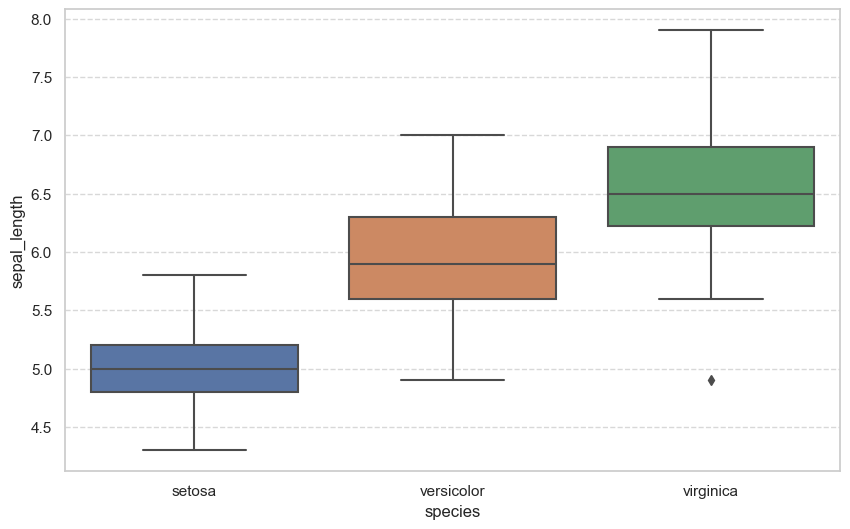

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df,x="species",y="sepal_length")
plt.show()

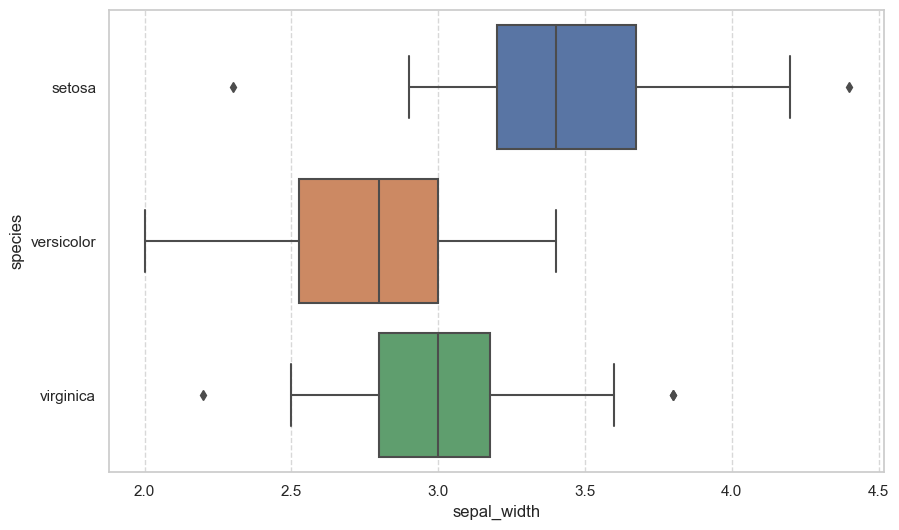

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df,y="species",x="sepal_width")
plt.show()

## Part 1 - Task 2: Creating Regression Plot

A scatter plot displays the relationship between 2 numeric variables. Each data point is represented as a circle.

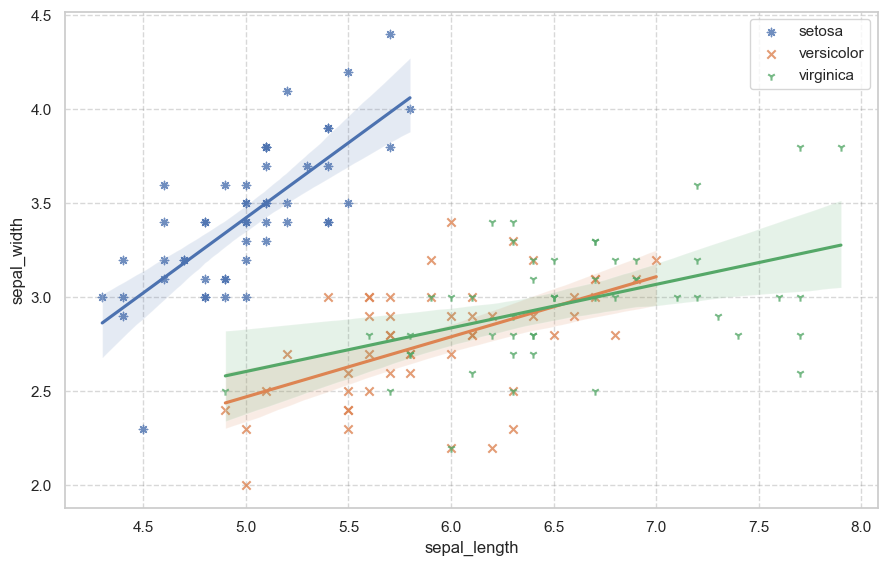

In [41]:
sns.lmplot(x="sepal_length",y="sepal_width",data=df,fit_reg=True,hue='species',legend=False, markers=[(8, 2, 0),"x","1"])
plt.legend(loc = 'upper right')

# You can't directly use fig, ax = plt.subplots(figsize=(10, 6)) with sns.lmplot because lmplot creates its own figure and axes.
plt.gcf().set_size_inches(10, 6) 

# Get the current axis and enable all spines (borders)
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

plt.show()

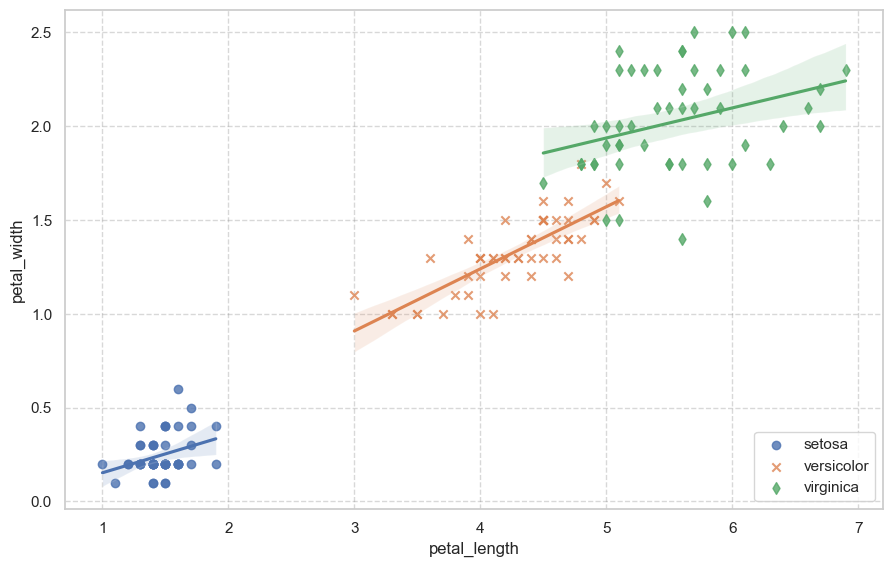

In [42]:
sns.lmplot(x="petal_length",y="petal_width",data=df,fit_reg=True,hue='species',legend=False, markers=["o","x","d"])
plt.legend(loc='lower right')

# You can't directly use fig, ax = plt.subplots(figsize=(10, 6)) with sns.lmplot because lmplot creates its own figure and axes.
plt.gcf().set_size_inches(10, 6) 

# Get the current axis and enable all spines (borders)
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)



plt.show()

## Part 1 - Task 3: Creating Bubble Chart

A bubble plot is a scatterplot where the circle size is mapped to the value of a third numeric variable. 

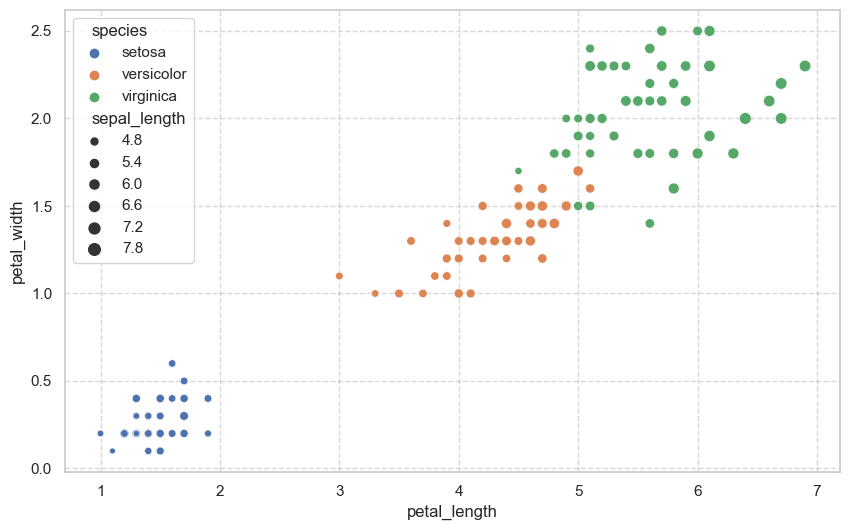

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x="petal_length",y="petal_width",data=df, size="sepal_length",hue="species")
plt.show()

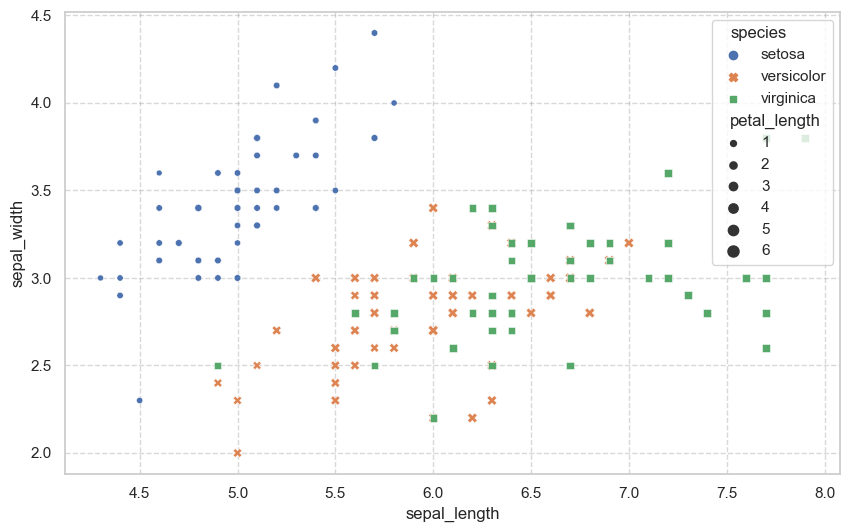

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x="sepal_length",y="sepal_width",data=df, size="petal_length",hue="species",\
                style = "species")
plt.show()

## Part 1 - Task 4: Creating Radar Chart

A radar chart (or spider plot, or polar chart) allows to visualize one or more series of values over multiple quantitative variables. Each variable has its own axis, all axes are joined in the center of the figure.

## 1.Plotly Express

In [96]:
import plotly.express as px

In [97]:
df=pd.DataFrame(dict(r_1=[20,12,20,10,15],theta_1=['market cap','satisfaction','revenue','growth','inclusion']))
df

r_1       theta_1
0   20    market cap
1   12  satisfaction
2   20       revenue
3   10        growth
4   15     inclusion

In [98]:
import plotly.express as px

# Create a sample polar line chart
fig = px.line_polar(df, r='r_1', theta='theta_1', line_close=True)
fig.update_traces(fill='toself')

# Apply the 'plotly_white' template and customize gridlines, axis lines, font, and margins
fig.update_layout(
    template="plotly_white",
    polar=dict(
        radialaxis=dict(
            gridcolor="black",  # Darker radial gridlines
            gridwidth=1,      # Thickness of the radial gridlines
            linecolor="black",  # Darker radial axis lines
            linewidth=1         # Thickness of the radial axis lines
        ),
        angularaxis=dict(
            gridcolor="black",  # Darker angular gridlines
            gridwidth=1,      # Thickness of the angular gridlines
            linecolor="black",  # Darker angular axis lines
            linewidth=1         # Thickness of the angular axis lines
        )
    ),
    font=dict(size=16),  # Set the font size to 14
    margin=dict(l=50, r=50, t=50, b=50)  # Customize the margins (left, right, top, bottom)
)

# Show the plot
fig.show()

## Process Visualisation

## Part 2- Task 1: Creating Gantt Chart

Gantt chart showing status of completion per task by time

In [103]:
import plotly.figure_factory as ff

df = [dict(Task="Job-1", Start='2021-06-01', Finish='2021-07-02', Resource='Complete'),
      dict(Task="Job-1", Start='2021-07-15', Finish='2021-08-15', Resource='In progress'),
      dict(Task="Job-2", Start='2021-06-17', Finish='2021-07-17', Resource='Not Started'),
      dict(Task="Job-2", Start='2021-05-17', Finish='2021-07-17', Resource='Complete'),
      dict(Task="Job-3", Start='2021-08-10', Finish='2021-08-20', Resource='Not Started'),
      dict(Task="Job-3", Start='2021-09-01', Finish='2021-09-20', Resource='Not Started'),
      dict(Task="Job-3", Start='2021-08-18', Finish='2021-11-18', Resource='Not Started'),
      dict(Task="Job-4", Start='2021-06-14', Finish='2021-08-14', Resource='Complete')]

colors = {'Not Started': 'rgb(220, 0, 0)',
          'In progress': 'rgb(1, 0.9, 0.16)',
          'Complete': 'rgb(0, 255, 100)'}

fig = ff.create_gantt(df, colors=colors, index_col='Resource', show_colorbar=False,
                      group_tasks=True)

fig.update_layout(
    font=dict(size=16),  # Set font size
    margin=dict(l=50, r=50, t=50, b=50),  # Customize margins
    template="plotly_white",  # Apply the 'plotly_white' template
    title=dict(text="Project Gantt Chart", font=dict(size=20), x=0.5),  # Add a title
    xaxis=dict(
        showline=True,  # Show the x-axis line
        linecolor="black",  # Set the x-axis line color to black
        linewidth=1  # Set the x-axis line width
    ),
    yaxis=dict(
        showline=True,  # Show the y-axis line
        linecolor="black",  # Set the y-axis line color to black
        linewidth=2  # Set the y-axis line width
    )
)




fig.show()

## Part 2- Task 2: Creating Waterfall chart

Waterfall chart is a 2-dimensional plot, used to understanding the cumulative effects of sequentially added 
positive or negative values for a given variable.

This chart helps us to understand how an initial value is increased and decreased over time or over a series of intermediate steps.

The cumulative effects can be either time-based or category-based.

This type of plot is commonly used in financial analysis to understand how a particular value goes through gains and losses over time.

**Task:** use the data provided to map gains and losses of the company in 2020. Your graph should reflect the annual revenue progress 

Explain, what insights you have derived from the visualisation.

In [107]:
df = pd.read_csv('cfdata.csv')
df.head()

year     month  revenue  change
0  2020   January      500     500
1  2020  February      100    -400
2  2020     March      700     600
3  2020     April      350    -350
4  2020       May       50    -300

In [108]:
# varying the sorted_value parameter 
a = df['month']
b = df['change']

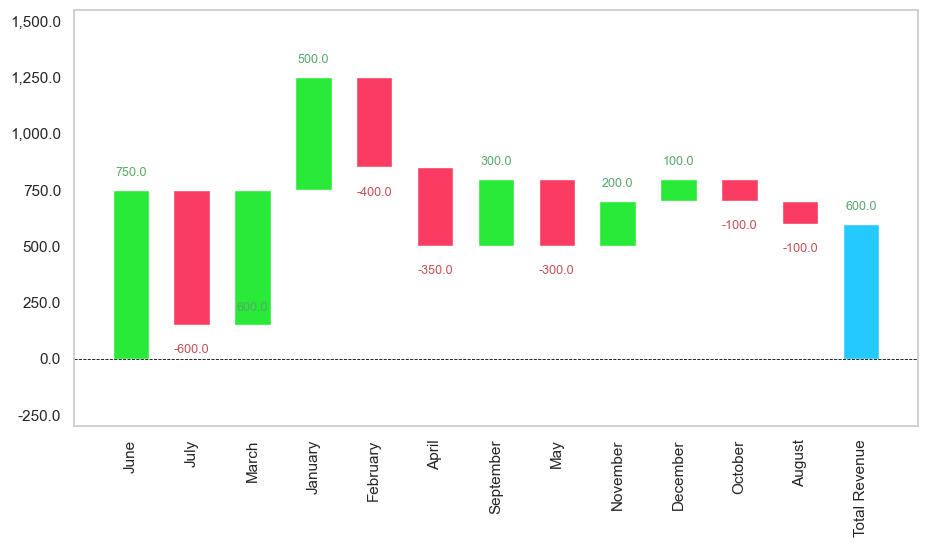

In [114]:
waterfall_chart.plot(a, 
                     b,
                     sorted_value=True,
                     net_label='Total Revenue',
                     rotation_value=90)

plt.gcf().set_size_inches(10, 6) 

# Set style to 'whitegrid' but disable gridlines for the plot
sns.set(style="whitegrid")
plt.grid(False)  # Disable the grid for this specific plot

plt.show()

command threshold which groups all contributions under a certain threshold to as a separate ‘other’ contribution.

If you set the value of the threshold to be 0.75, then it will take 0.75 of the maximum change as a cut off point, showing all other parts below the threshold in the "other" column.

You can also try thresholds greater or less than 0.75

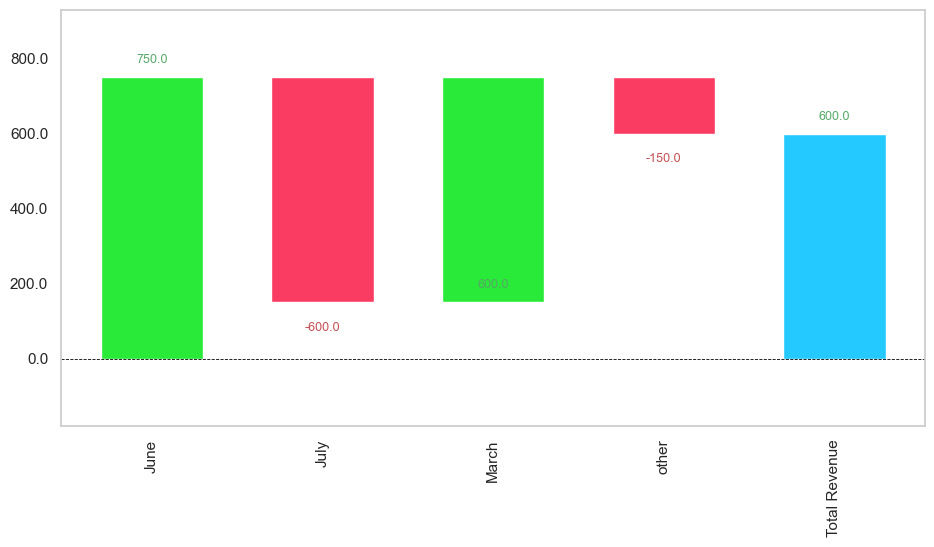

In [118]:
# When threshold value is 0.75 x 750 = 562.5
waterfall_chart.plot(a, 
                     b,
                     sorted_value=True,
                     net_label='Total Revenue',
                     rotation_value=90,
                     threshold=0.75)

plt.gcf().set_size_inches(10, 6) 

# Set style to 'whitegrid' but disable gridlines for the plot
sns.set(style="whitegrid")
plt.grid(False)  # Disable the grid for this specific plot
plt.show()

**Insight:** 
The largest increase in the revenue was in June, while the largest decline in revenue was in July.
Overall, the growth in the first half of the year was greater than that in the second part of the year.
It is important to investgate the sales in June, July and second half of the year to 
understand the relative decline in growth.

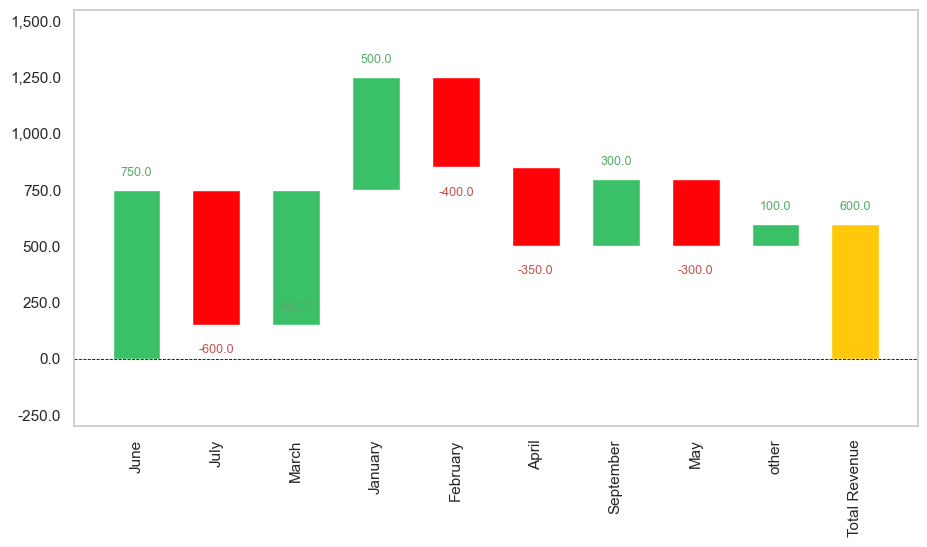

In [119]:
# When threshold value is 0.3 x 750 = 225 and changing colors using HEX code
waterfall_chart.plot(a, 
                     b,
                     sorted_value=True,
                     net_label='Total Revenue',
                     rotation_value=90,
                     threshold=0.3,
                     blue_color="#FFC80A",
                     green_color="#3ac167",
                     red_color="#FF0208")

plt.gcf().set_size_inches(10, 6) 

# Set style to 'whitegrid' but disable gridlines for the plot
sns.set(style="whitegrid")
plt.grid(False)  # Disable the grid for this specific plot
plt.show()

## Part 2 - Task 3:  Creating Funnel Charts

In this task, we will build on the example on website visits demonstrated during the Lecture. We saw that:

In [121]:
data = dict(
    number=[4500, 1500, 750, 500, 250],
    stage=["Website visits", "Downloads", "Contacted by email", "Requested price", "Purchased"])
data

{'number': [4500, 1500, 750, 500, 250],
 'stage': ['Website visits',
  'Downloads',
  'Contacted by email',
  'Requested price',
  'Purchased']}

In [133]:
fig = px.funnel(data, x='number', y='stage')


fig.update_layout(
    font=dict(size=14),  # Set font size
    margin=dict(l=50, r=50, t=50, b=50),  # Customize margins
    template="plotly_white",  # Apply the 'plotly_white' template
    title=dict(text="Funnel Chart", font=dict(size=20), x=0.5),  # Add a title
    xaxis=dict(showgrid=True, gridcolor="black", gridwidth=1),  # Emphasize gridlines
    yaxis=dict(showline=True, linecolor="black", linewidth=2),  # Add a line to the Y-axis
    width=950,  # Set the width of the figure
    height=600  # Set the height of the figure
)

fig.show()

The codes above were drawn from <code>plotly.express</code>, an entry-point into the <code>plotly</code> library. In the subsequent example, we will use <code>plotly.graph_objects</code> to add customization that is not possible with  <code>plotly.express</code>. For more information: https://plotly.com/python/graph-objects/

Here we have customer locations in 3 cities, and when we want to plot percentages of customers per location.

In [134]:
from plotly import graph_objects as go

fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'Sydney',
    y = ["Website visits", "Downloads", "Contacted by email", "Requested price", "Purchased"],
    x = [2500, 1000, 500, 400, 230 ],
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'Melbourne',
    orientation = "h",
    y = ["Website visits", "Downloads", "Contacted by email", "Requested price", "Purchased"],
    x = [1000, 300, 200, 75, 20],
    textposition = "inside",
    textinfo = "value+percent previous"))

fig.add_trace(go.Funnel(
    name = 'Perth',
    orientation = "h",
    y = ["Website visits", "Downloads", "Contacted by email", "Requested price", "Purchased"],
    x = [1000, 200, 50, 25],
    textposition = "inside",
    textinfo = "value+percent total"))

fig.update_layout(
    font=dict(size=14),  # Set font size
    margin=dict(l=50, r=50, t=50, b=50),  # Customize margins
    template="plotly_white",  # Apply the 'plotly_white' template
    title=dict(text="Funnel Chart", font=dict(size=20), x=0.5),  # Add a title
    xaxis=dict(showgrid=True, gridcolor="black", gridwidth=1),  # Emphasize gridlines
    yaxis=dict(showline=True, linecolor="black", linewidth=2),  # Add a line to the Y-axis
    width=950,  # Set the width of the figure
    height=600  # Set the height of the figure
)


fig.show()